# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential, optimizers

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-01.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-02.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-03.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-04.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-05.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-06.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-07.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-08.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-09.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-10.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-11.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-12.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-13.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-14.tif
C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali\1\B-S-1-F-15.tif
C:/Users/A

# Train & Test Directories 

In [3]:
import os

base_path = 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/'


In [4]:
dir_list = next(os.walk(base_path))[1]
dir_list.sort()


# Splitting Dataset

In [5]:
train_forge = []
train_genuine = []

# Inside the loops, add print statements to debug
for directory in dir_list:
    images = os.listdir(base_path+directory)
    images.sort()
    images = [base_path +directory+'/'+x for x in images]
    train_forge.append(images[:20]) #24/30 forged
    train_genuine.append(images[24:44]) # 20/24 gen


test_forge = []
test_genuine = []

for directory in dir_list:
    images = os.listdir(base_path+directory)
    images.sort()
    images = [base_path +directory+'/'+x for x in images]
    test_forge.append(images[20:22]) #24-26/30 forged
    test_genuine.append(images[44:46]) # 50-51/24 gen


valid_forge = []
valid_genuine = []

for directory in dir_list:
    images = os.listdir(base_path+directory)
    images.sort()
    images = [base_path +directory+'/'+x for x in images]
    valid_forge.append(images[22:24]) #27-30/30 forged
    valid_genuine.append(images[46:48]) # 52-54/24 gen


In [6]:
train_imgs = train_forge + train_genuine
random.shuffle(train_imgs)


In [7]:
test_imgs = test_forge + test_genuine
random.shuffle(test_imgs)


In [8]:
valid_imgs = valid_forge + valid_genuine
random.shuffle(valid_imgs)


In [9]:
length_of_image_list = len(train_imgs)
# Print the result
print(f"Length of the image list: {length_of_image_list}")

Length of the image list: 220


In [10]:
for image in valid_imgs:
    print(image)

['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/47/B-S-47-F-23.tif', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/47/B-S-47-F-24.tif']
['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/85/Genuine (8).tif', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/85/Genuine (9).tif']
['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/27/B-S-27-F-23.tif', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/27/B-S-27-F-24.tif']
['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/109/Forged (8).jpg', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/109/Forged (9).jpg']
['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/10/B-S-10-F-23.tif', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/10/B-S-10-F-24.tif']
['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/8/Genuine (8).tif', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/8/Genuine (9).tif']
['C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/45/Genuine (8).tif', 'C:/Users/Admin/Downloads/SoftCom_Pattern/Bengali/45/Genuine (9).tif']
[

# Preprocessing 

In [11]:
import cv2
import os
import numpy as np


def read_and_process_image(list_of_images):
    X = []
    y = []

    for image in list_of_images:
        # Read the image in color
        img = cv2.imread(image, cv2.IMREAD_COLOR)
        
        # Resize the image to the desired dimensions
        img_resized = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)

        X.append(img_resized)
        
        # Label based on the presence of 'Forged' in the image path
        if 'Genuine' in image:
            y.append(1)
        else:
            y.append(0)

    return X, y



In [12]:
from itertools import chain

# Flatten the nested lists
train_imgs = list(chain.from_iterable(train_imgs))
test_imgs = list(chain.from_iterable(test_imgs))
valid_imgs = list(chain.from_iterable(valid_imgs))

# Read and process images for training, testing, and validation sets with CLAHE
X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X_valid, y_valid = read_and_process_image(valid_imgs)


In [13]:
print("Labels for train:", y_train)
print("Labels for test:", y_test)
print("Labels for valid:", y_valid)

Labels for train: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Converting Train & Val Data To np Array


In [14]:
# Convert to NumPy arrays
X_val = np.array(X_valid)
y_val = np.array(y_valid)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
# Assuming X_train, X_val, and X_test are your input data arrays
print("Original shapes:")
print("X_train shape:", X_train[0].shape)
print("X_val shape:", X_val[0].shape)
print("X_test shape:", X_test[0].shape)


Original shapes:
X_train shape: (256, 256, 3)
X_val shape: (256, 256, 3)
X_test shape: (256, 256, 3)


# Data Augmentation

In [16]:
from keras.preprocessing.image import ImageDataGenerator

X_train = X_train.reshape(X_train.shape[0], 256, 256, 3)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 3)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 3)

# Generating Larger DataSet
## Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)


In [17]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (4400, 256, 256, 3)
X_val shape: (440, 256, 256, 3)
X_test shape: (440, 256, 256, 3)


In [18]:
import numpy as np

# Assuming X_train is your training dataset
sequence_lengths = [len(sequence) for sequence in X_train]

average_length = np.mean(sequence_lengths)
max_length = np.max(sequence_lengths)

print(f"Average Sequence Length: {average_length}")
print(f"Maximum Sequence Length: {max_length}")


Average Sequence Length: 256.0
Maximum Sequence Length: 256


# Feature Extraction

In [19]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
# from keras.optimizers import Adam
# from keras.applications import MobileNetV2

# # Load the pre-trained MobileNetV2 model
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# print("MobileNetV2 Input Shape:", base_model.input_shape)

# # Freeze the layers of the pre-trained MobileNetV2 model
# for layer in base_model.layers:
#     layer.trainable = False

# model = Sequential()
# model.add(base_model)

# # Add additional layers directly without Flatten
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# # Global average pooling instead of Flatten
# model.add(GlobalAveragePooling2D())

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Print a summary of the model architecture
# model.summary()


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
print("MobileNetV2 Input Shape:", base_model.input_shape)

# Freeze the layers of the pre-trained MobileNetV2 model
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

# Add the VGG19 base model
model.add(base_model)

# Add additional CNN layers with smaller pooling windows
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
print(model.layers[-3].output.shape)  # Print the shape after the previous Conv2D layer

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
print(model.layers[-3].output.shape)  # Print the shape after the previous Conv2D layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
print(model.layers[-3].output.shape)  # Print the shape after the previous Conv2D layer

# Flatten the output before the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model summary
model.summary()




MobileNetV2 Input Shape: (None, 256, 256, 3)
(None, 8, 8, 1280)
(None, 6, 6, 256)
(None, 4, 4, 128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 256)         2949376   
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 256)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)              

In [21]:
# Assuming you have X_train, y_train, X_val, y_val, X_test, y_test prepared

# Training the model using fit
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 64,  # Adjust this based on your actual data size
    epochs=20,  # You can adjust the number of epochs
    validation_data=val_generator,
    validation_steps=len(X_val) // 64,  # Adjust this based on your actual data size
)


Epoch 1/20


68/68 [==============================] - 143s 2s/step - loss: 0.7507 - accuracy: 0.6204 - val_loss: 0.5297 - val_accuracy: 0.7344
Epoch 2/20
68/68 [==============================] - 139s 2s/step - loss: 0.5078 - accuracy: 0.7558 - val_loss: 0.4461 - val_accuracy: 0.8099
Epoch 3/20
68/68 [==============================] - 138s 2s/step - loss: 0.4212 - accuracy: 0.7952 - val_loss: 0.4173 - val_accuracy: 0.8281
Epoch 4/20
68/68 [==============================] - 164s 2s/step - loss: 0.3810 - accuracy: 0.8254 - val_loss: 0.4043 - val_accuracy: 0.8255
Epoch 5/20
68/68 [==============================] - 143s 2s/step - loss: 0.3469 - accuracy: 0.8452 - val_loss: 0.4713 - val_accuracy: 0.7943
Epoch 6/20
68/68 [==============================] - 143s 2s/step - loss: 0.3116 - accuracy: 0.8658 - val_loss: 0.4237 - val_accuracy: 0.8203
Epoch 7/20
68/68 [==============================] - 163s 2s/step - loss: 0.3438 - accuracy: 0.8473 - val_loss: 0.4314 - val_accuracy: 0.8151
Epoch 8/20


In [22]:
# Save the model to a file
model.save("mobilenet.h5")



C:\Users\Admin\.conda\envs\thesis\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('mobilenet.h5')

# Evaluate the loaded model on the test set
test_results = loaded_model.evaluate(test_generator, steps=len(X_test) // 64)

print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

6/6 [==============================] - 8s 1s/step - loss: 0.2549 - accuracy: 0.9010
Test Loss: 0.2548978626728058
Test Accuracy: 0.9010416865348816


In [27]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np

# Step 2: Generate Predictions
y_pred_probabilities = model.predict(X_test)

# Step 3: Convert Probabilities to Binary Predictions
threshold = 0.6
y_pred_binary = (y_pred_probabilities > threshold).astype(int)

# Now you have y_true and y_pred_binary to use for evaluation metrics

# Calculate precision and recall
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)


14/14 [==============================] - 10s 618ms/step
Precision: 0.5081585081585082
Recall: 0.990909090909091
Confusion Matrix:
[[  9 211]
 [  2 218]]


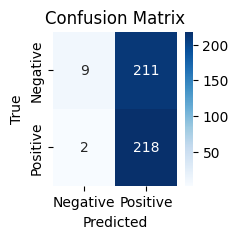

In [31]:
# Set up the labels
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Save the image
plt.savefig('mobilenet_cm.png')
plt.show()

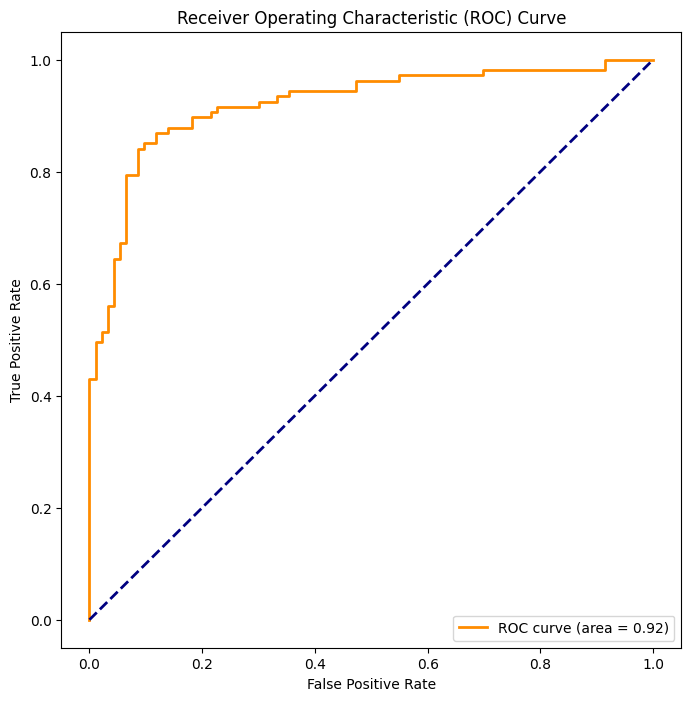

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Example data (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (replace this with your actual model training code)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the image
plt.savefig('mobilenet_roc_curve.png')

# Show the plot
plt.show()
